In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


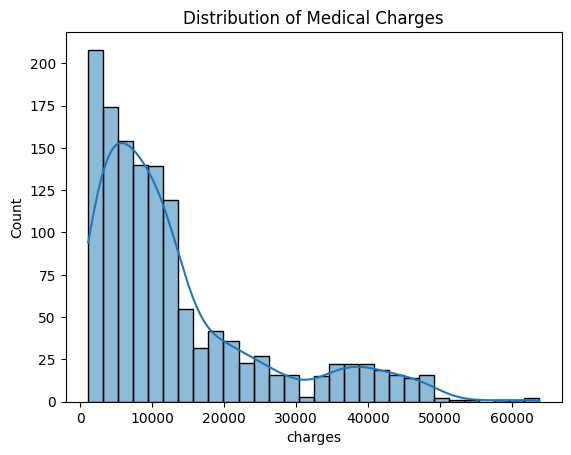

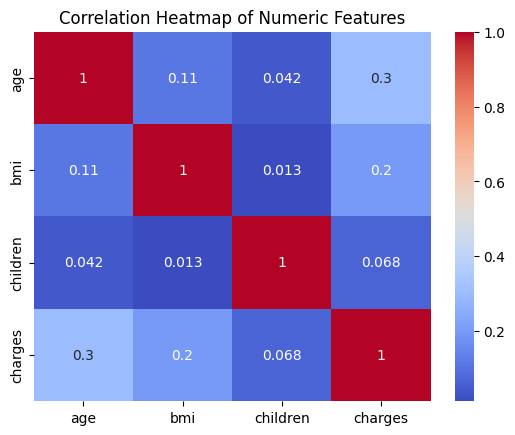

Linear Regression RMSE: 5796.284659276274
Linear Regression R2 Score: 0.7835929767120722
Random Forest RMSE: 4579.22365696789
Random Forest R2 Score: 0.8649310103918915
               Model         RMSE  R2 Score
0  Linear Regression  5796.284659  0.783593
1      Random Forest  4579.223657  0.864931


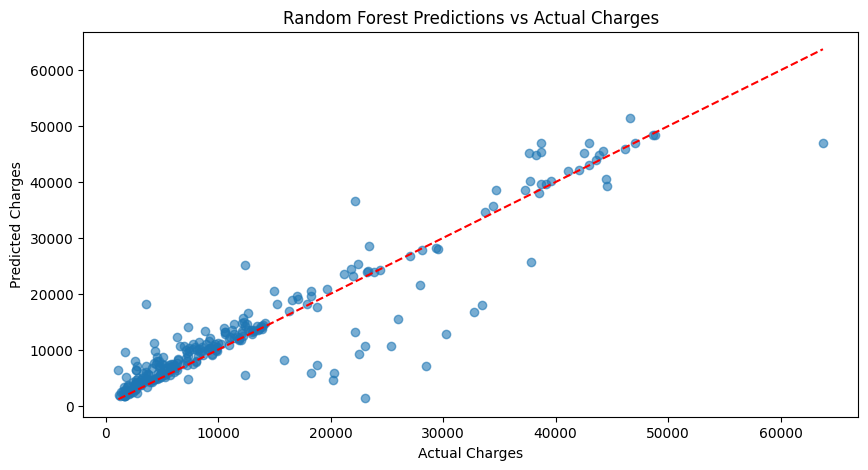

In [3]:
# =========================
# Step 1: Import Libraries
# =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# =========================
# Step 2: Load Dataset
# =========================
# Make sure to upload the insurance.csv file in Kaggle Dataset
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')
data.head()

# =========================
# Step 3: Explore Dataset
# =========================
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Distribution of target variable
sns.histplot(data['charges'], kde=True)
plt.title('Distribution of Medical Charges')
plt.show()

# Correlation heatmap
# Correlation heatmap for numeric columns only
numeric_cols = data.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# =========================
# Step 4: Feature & Target
# =========================
X = data.drop('charges', axis=1)
y = data['charges']

# =========================
# Step 5: Preprocessing
# =========================
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')  # drop first to avoid dummy variable trap

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# =========================
# Step 6: Train-Test Split
# =========================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =========================
# Step 7: Linear Regression
# =========================
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr))

# =========================
# Step 8: Random Forest Regression
# =========================
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=200, random_state=42))])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf))

# =========================
# Step 9: Compare Models
# =========================
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_lr)), np.sqrt(mean_squared_error(y_test, y_pred_rf))],
    'R2 Score': [r2_score(y_test, y_pred_lr), r2_score(y_test, y_pred_rf)]
})
print(results)

# =========================
# Step 10: Visualize Predictions
# =========================
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Random Forest Predictions vs Actual Charges')
plt.show()


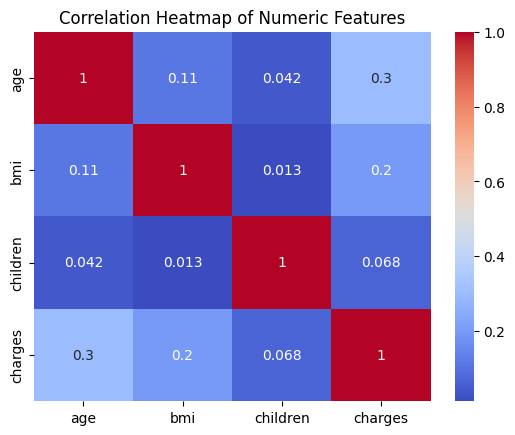

In [2]:
# Correlation heatmap for numeric columns only
numeric_cols = data.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()
